### Bienvenido a la segunda práctica de Jupter Notebook
### Maestría en ingeniería de información
### Ciencia de datos aplicada

Para cargar las librerías

In [60]:
# Importante librerias o modulos que se van a usar en esta sesion
import os, sys
import numpy as np
import pandas as pd
import pandas_profiling   ####Verificar que esté instalada.

##Librerías para graficar
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt

In [3]:
#### Configuración del directorio
%cd C:\Users\USUARIO\Documents\Monitoria_cda_2019_2\Clases_Python\Clase1_Python_ams 

C:\Users\USUARIO\Documents\Monitoria_cda_2019_2\Clases_Python\Clase1_Python_ams


In [7]:
###Lectura de los datos
data=pd.read_csv('listings.csv')

A continuación, se va seleccionar únicamente las variables necesarias para nuestro análisis.

In [11]:
data_analisis=data.loc[:, ['id','room_type', 'name', 'summary',  'minimum_nights', 'maximum_nights','space', 'bathrooms', 'bedrooms', 'bed_type', 'price', 'weekly_price',
       'monthly_price', 'neighbourhood', 'city', 'state', 'country','first_review','last_review', 'review_scores_rating', 'number_of_reviews','has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365']]

A continuación se detalla el tipo de datos

In [14]:
data_analisis.dtypes

id                        int64
room_type                object
name                     object
summary                  object
minimum_nights            int64
maximum_nights            int64
space                    object
bathrooms               float64
bedrooms                float64
bed_type                 object
price                    object
weekly_price             object
monthly_price            object
neighbourhood            object
city                     object
state                    object
country                  object
first_review             object
last_review              object
review_scores_rating    float64
number_of_reviews         int64
has_availability         object
availability_30           int64
availability_60           int64
availability_90           int64
availability_365          int64
dtype: object

Se realiza la correción de las variables asociadas a precio.

In [15]:
##Correción de las variables asociadas a precio
def eliminar_pesos(x):
    x['monthly_price']=str(x['monthly_price']).replace('$','')
    return x['monthly_price']

def eliminar_pesos_2(x):
    x['weekly_price']=str(x['weekly_price']).replace('$','')
    return x['weekly_price']

def eliminar_pesos_3(x):
    x['price']=str(x['price']).replace('$','')
    return x['price']

data_analisis['monthly_price']=data_analisis.apply(eliminar_pesos,axis=1)
data_analisis['weekly_price']=data_analisis.apply(eliminar_pesos_2,axis=1)
data_analisis['price']=data_analisis.apply(eliminar_pesos_3,axis=1)

In [16]:
def eliminar_coma(x):
    x['monthly_price']=str(x['monthly_price']).replace(',','')
    return x['monthly_price']

def eliminar_coma_2(x):
    x['weekly_price']=str(x['weekly_price']).replace(',','')
    return x['weekly_price']

def eliminar_coma_3(x):
    x['price']=str(x['price']).replace(',','')
    return x['price']

data_analisis['monthly_price']=data_analisis.apply(eliminar_coma,axis=1)
data_analisis['weekly_price']=data_analisis.apply(eliminar_coma,axis=1)
data_analisis['price']=data_analisis.apply(eliminar_coma,axis=1)

In [17]:
##Correción del tipo de datos
data_analisis["price"]=data_analisis["price"].astype(float)
data_analisis["weekly_price"]=data_analisis["price"].astype(float)
data_analisis["monthly_price"]=data_analisis["price"].astype(float)

In [18]:
data_analisis.dtypes

id                        int64
room_type                object
name                     object
summary                  object
minimum_nights            int64
maximum_nights            int64
space                    object
bathrooms               float64
bedrooms                float64
bed_type                 object
price                   float64
weekly_price            float64
monthly_price           float64
neighbourhood            object
city                     object
state                    object
country                  object
first_review             object
last_review              object
review_scores_rating    float64
number_of_reviews         int64
has_availability         object
availability_30           int64
availability_60           int64
availability_90           int64
availability_365          int64
dtype: object

A continuación se realiza un pandas profiling de la data resultante.

In [19]:
pandas_profiling.ProfileReport(data_analisis)

A continuación se realiza una función que permite identificar el porcentaje de missing de todas las variables de la tabla.

In [20]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [22]:
missing_values_table(data_analisis)

,Missing Values,% of Total Values
id,0,0.000000
room_type,0,0.000000
name,35,0.172100
summary,600,2.950288
minimum_nights,0,0.000000
maximum_nights,0,0.000000
space,5321,26.164134
bathrooms,7,0.034420
bedrooms,8,0.039337
bed_type,0,0.000000


#### ¿Qué conclusiones iniciales puede obtener de la tabla anterior?

A continuación, se realizará un análisis sobre el conjunto de datos "Summary information and metrics for listings in Amsterdam (good for visualisations)."

In [26]:
#### Configuración del directorio
%cd C:\Users\USUARIO\Documents\Monitoria_cda_2019_2\Clases_Python\Clase2_Python 
###Lectura de los datos
data_analisis_summary=pd.read_csv('listings2.csv')

C:\Users\USUARIO\Documents\Monitoria_cda_2019_2\Clases_Python\Clase2_Python


In [27]:
data_analisis_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,262,2019-06-28,2.09,1,107
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,80,1,279,2019-07-08,2.45,2,140
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,2019-05-11,0.17,2,106
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38673,4.89208,Private room,150,2,195,2019-07-01,2.14,1,74
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,277,2019-07-02,2.56,3,138


In [32]:
data_analisis_summary.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [28]:
data_analisis_summary.shape

(20337, 16)

In [30]:
data_analisis.shape

(20337, 26)

In [31]:
missing_values_table(data_analisis_summary)

,Missing Values,% of Total Values
id,0,0.000000
name,35,0.172100
host_id,0,0.000000
host_name,24,0.118012
neighbourhood_group,20337,100.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000


#### ¿Cuáles son las categorías de neighbourhood_group y neighbourhood?

In [40]:
data_analisis_summary.neighbourhood_group.unique()  ###El 100% es missing.

array([nan])

In [36]:
data_analisis_summary.neighbourhood.unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
       'Centrum-West', 'Zuid', 'De Pijp - Rivierenbuurt',
       'De Baarsjes - Oud-West', 'Westerpark', 'Bos en Lommer',
       'Oud-Oost', 'Slotervaart', 'Oud-Noord', 'Geuzenveld - Slotermeer',
       'Watergraafsmeer', 'IJburg - Zeeburgereiland', 'Noord-Oost',
       'Gaasperdam - Driemond', 'Bijlmer-Oost', 'Buitenveldert - Zuidas',
       'Noord-West', 'De Aker - Nieuw Sloten', 'Osdorp',
       'Bijlmer-Centrum'], dtype=object)

#### ¿Cuál es el número de categorías que hay sobbre la variable neighbourhood?

In [41]:
data_analisis_summary.neighbourhood.describe()

count                      20337
unique                        22
top       De Baarsjes - Oud-West
freq                        3468
Name: neighbourhood, dtype: object

#### ¿Cuál es la frecuencia o el número de observaciones por cada categoría de la variable neighbourhood?

In [42]:
pd.value_counts(data_analisis_summary['neighbourhood'])

De Baarsjes - Oud-West                    3468
De Pijp - Rivierenbuurt                   2503
Centrum-West                              2317
Centrum-Oost                              1778
Westerpark                                1506
Zuid                                      1425
Oud-Oost                                  1349
Bos en Lommer                             1162
Oostelijk Havengebied - Indische Buurt     966
Oud-Noord                                  613
Watergraafsmeer                            579
IJburg - Zeeburgereiland                   491
Slotervaart                                397
Noord-West                                 363
Noord-Oost                                 279
Buitenveldert - Zuidas                     263
Geuzenveld - Slotermeer                    220
De Aker - Nieuw Sloten                     150
Gaasperdam - Driemond                      142
Osdorp                                     141
Bijlmer-Centrum                            118
Bijlmer-Oost 

#### ¿Cuál es la frecuencia relativa por cada categoría de la variable neighbourhood?

In [43]:
100 * data_analisis_summary['neighbourhood'].value_counts() / len(data_analisis_summary['neighbourhood'])

De Baarsjes - Oud-West                    17.052663
De Pijp - Rivierenbuurt                   12.307617
Centrum-West                              11.393027
Centrum-Oost                               8.742686
Westerpark                                 7.405222
Zuid                                       7.006933
Oud-Oost                                   6.633230
Bos en Lommer                              5.713724
Oostelijk Havengebied - Indische Buurt     4.749963
Oud-Noord                                  3.014211
Watergraafsmeer                            2.847028
IJburg - Zeeburgereiland                   2.414319
Slotervaart                                1.952107
Noord-West                                 1.784924
Noord-Oost                                 1.371884
Buitenveldert - Zuidas                     1.293209
Geuzenveld - Slotermeer                    1.081772
De Aker - Nieuw Sloten                     0.737572
Gaasperdam - Driemond                      0.698235
Osdorp      

Aveces los resultados son más fáciles de mostrar a través de un gráfico.

### Gráfico de barras asociado a la frecuencia absoluta y relativa.

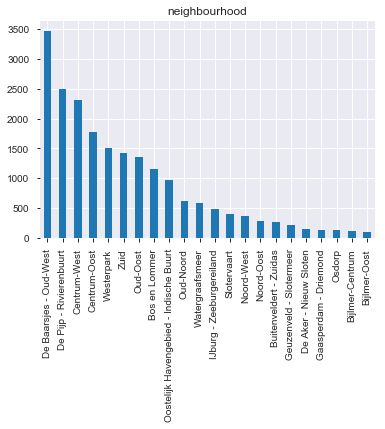

In [45]:
plot_frec_abs = data_analisis_summary['neighbourhood'].value_counts().plot(kind='bar', title='neighbourhood')

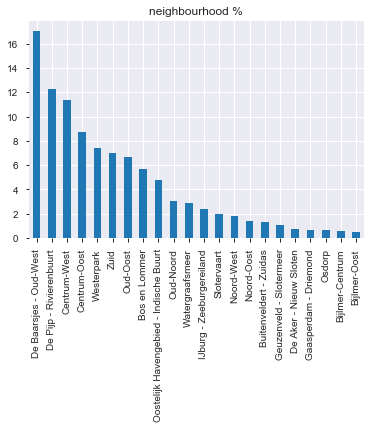

In [46]:
plot_frec_rel = (100 * data_analisis_summary['neighbourhood'].value_counts() / len(data_analisis_summary['neighbourhood'])).plot(
kind='bar', title='neighbourhood %')

### ¿Cuál es la distribución de la variable price?

In [51]:
data_analisis_summary['price'].describe()

count    20337.000000
mean       158.213650
std        157.519629
min          0.000000
25%         99.000000
50%        130.000000
75%        180.000000
max       8915.000000
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CDBBF8DF60>]],
      dtype=object)

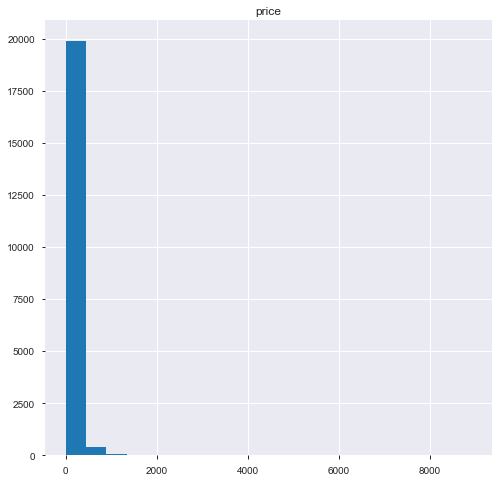

In [52]:
data_analisis_summary.hist('price',figsize=(8,8),bins=20)

El gráfico anterior, permite evidenciar que la variable precio tiene un conjunto de datos atípicos y por lo tanto, no es posible visualizar la distribución. A continuación, se visualizará únicamente aquellas observaciones cuyo precio es menor o igual a 180.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CDBC0F1A58>]],
      dtype=object)

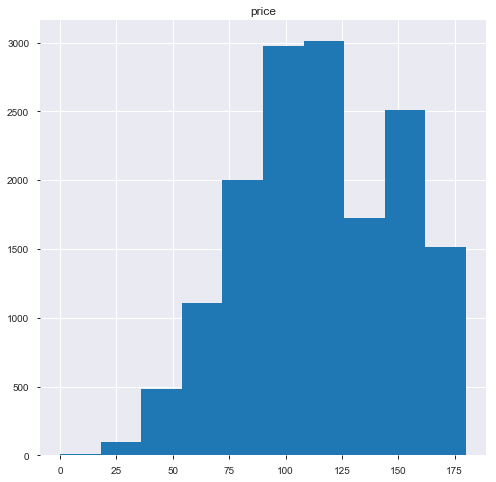

In [54]:
data_analisis_summary[data_analisis_summary.price <=180].hist('price',figsize=(8,8),bins=10)


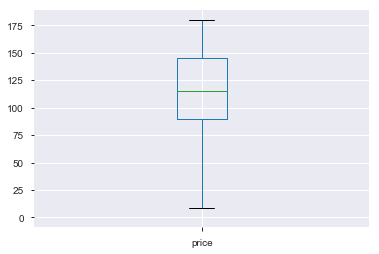

In [55]:
data_analisis_summary[data_analisis_summary.price <=180].boxplot('price')

### Análisis incluyendo las dos variables anteriores.

In [56]:
data_analisis_summary.pivot_table(values='price',columns='neighbourhood',aggfunc=np.mean)

neighbourhood,Bijlmer-Centrum,Bijlmer-Oost,Bos en Lommer,Buitenveldert - Zuidas,Centrum-Oost,Centrum-West,De Aker - Nieuw Sloten,De Baarsjes - Oud-West,De Pijp - Rivierenbuurt,Gaasperdam - Driemond,...,Noord-Oost,Noord-West,Oostelijk Havengebied - Indische Buurt,Osdorp,Oud-Noord,Oud-Oost,Slotervaart,Watergraafsmeer,Westerpark,Zuid
price,95.050847,88.448598,121.04389,163.874525,200.07649,201.322831,130.773333,147.309689,162.905314,96.56338,...,124.921147,124.823691,130.873706,104.836879,159.507341,143.977761,121.619647,143.013817,146.869854,184.482807


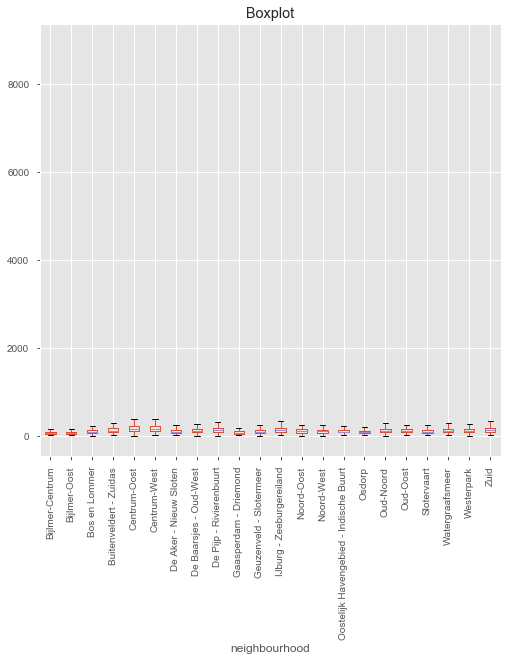

In [62]:
data_analisis_summary.boxplot('price',by="neighbourhood", figsize=(8,8))
#plt.xticks(rotation=25)
#plt.xlabel('hi',rotation=60)
plt.title("Boxplot")
plt.suptitle("")
plt.xticks(rotation=90)
plt.show()

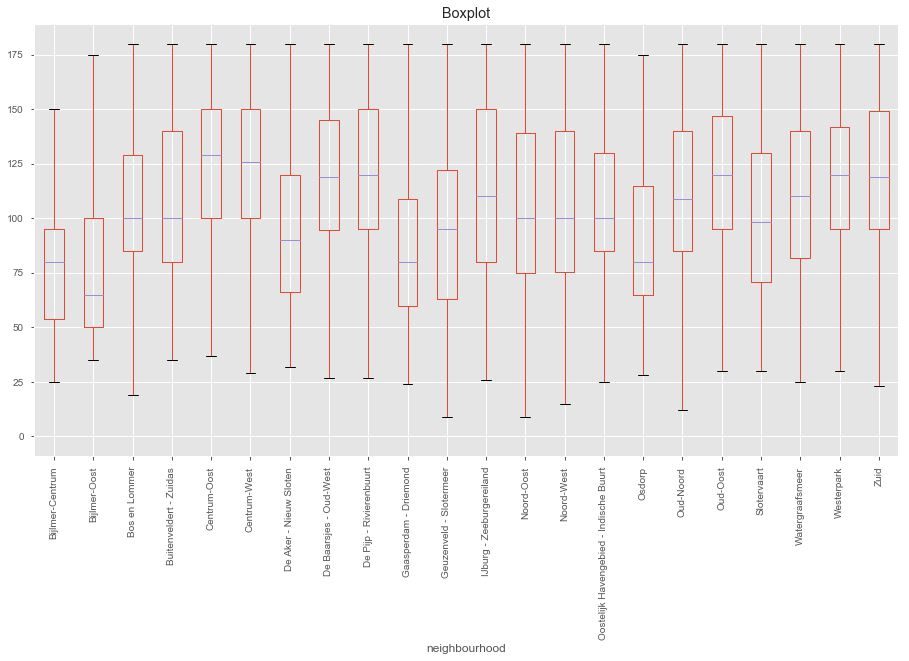

In [66]:
data_analisis_summary[data_analisis_summary.price <=180].boxplot('price',by="neighbourhood", figsize=(15,8))
#plt.xticks(rotation=25)
#plt.xlabel('hi',rotation=60)
plt.title("Boxplot")
plt.suptitle("")
plt.xticks(rotation=90)
plt.show()

In [68]:
##Se puede realizar el mismo anàlisis "agrupando" por la suma del precio, sin embargo, esto tiene sentido?
data_analisis_summary.pivot_table(values='price',columns='neighbourhood',aggfunc=np.sum)

neighbourhood,Bijlmer-Centrum,Bijlmer-Oost,Bos en Lommer,Buitenveldert - Zuidas,Centrum-Oost,Centrum-West,De Aker - Nieuw Sloten,De Baarsjes - Oud-West,De Pijp - Rivierenbuurt,Gaasperdam - Driemond,...,Noord-Oost,Noord-West,Oostelijk Havengebied - Indische Buurt,Osdorp,Oud-Noord,Oud-Oost,Slotervaart,Watergraafsmeer,Westerpark,Zuid
price,11216,9464,140653,43099,355736,466465,19616,510870,407752,13712,...,34853,45311,126424,14782,97778,194226,48283,82805,221186,262888


## Gracias!